### 使用教學
1. 把 repo clone 下來
2. 新增一個新的 cell ,將分析方法的程式碼放進去
3. 每個人要從資料觀察到至少一種現象的結論，以及將這些結論需要用到方法的程式碼寫出來
4. 將結論用 markdown 撰寫，步驟及簡單的解釋註解撰寫
4. 建立 pull request, 我 review 過會幫你 merge

### 評分重點
1. 要有視覺化(圖表之類的)的呈現!!! (解釋成績)
2. 如果有類別的資料就需要用表/圖去比較
3. 有連續的資料，需要去看關係 (分析關係)，若有相關性要做相關性比較，或是看有沒有正相關。
4. final conclusion (寫出你這段程式碼的結論，可以從數據中發現什麼現象)
5. 報告過程務必維持在20分鐘內（全部人，所以每個人務必要將自己的報告時間控制在四分鐘內）

### 資料集格式
#### Students’ Adaptability Level in school, college and university
. About this file:  Students’ Adaptability Level in school, college and university  
. Gender: Gender type of student  
. Age: Age range of the student  
. Education Level: Education institution level  
. Institution Type: Education institution type  
. IT Student: Studying as IT student or not  
. Location in Town: Is student location in town  
. Load-shedding: Level of load shedding  
. Financial Condition: Financial condition of family  
. Internet Type: Internet type used mostly in device  
. Network Type: Network connectivity type  
. Class Duration: Daily class duration  
. Self LMS: Institution’s own LMS availability  
. Device: Device used mostly in class  
. Adaptability Level: Adaptability level of the student  

In [150]:
import typing 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
# 檔案路徑
target_file: str = "students_adaptability_level_online_education.csv"
target_folder: str = "./dataset/"
target_path: str = f"{target_folder}{target_file}"


In [152]:
# 將 dataset 讀入 dataframe
df: pd.DataFrame = pd.read_csv(target_path)
df.head(3)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate


In [153]:
# 統計摘要
summary: pd.DataFrame = df.describe()
print(summary, end='\n\n')


       Gender    Age Education Level Institution Type IT Student Location  \
count    1205   1205            1205             1205       1205     1205   
unique      2      6               3                2          2        2   
top       Boy  21-25          School   Non Government         No      Yes   
freq      663    374             530              823        901      935   

       Load-shedding Financial Condition Internet Type Network Type  \
count           1205                1205          1205         1205   
unique             2                   3             2            3   
top              Low                 Mid   Mobile Data           4G   
freq            1004                 878           695          775   

       Class Duration Self Lms  Device Adaptivity Level  
count            1205     1205    1205             1205  
unique              3        2       3                3  
top               1-3       No  Mobile         Moderate  
freq              840     

In [154]:
# 類別變數的統計資訊
categorical_summary: pd.DataFrame = df.describe(include=['object'])
print(categorical_summary, end='\n\n')

       Gender    Age Education Level Institution Type IT Student Location  \
count    1205   1205            1205             1205       1205     1205   
unique      2      6               3                2          2        2   
top       Boy  21-25          School   Non Government         No      Yes   
freq      663    374             530              823        901      935   

       Load-shedding Financial Condition Internet Type Network Type  \
count           1205                1205          1205         1205   
unique             2                   3             2            3   
top              Low                 Mid   Mobile Data           4G   
freq            1004                 878           695          775   

       Class Duration Self Lms  Device Adaptivity Level  
count            1205     1205    1205             1205  
unique              3        2       3                3  
top               1-3       No  Mobile         Moderate  
freq              840     

In [155]:
# 單變數統計分析
age_counts: pd.Series = df['Age'].value_counts()
print("年齡分佈：\n", age_counts, end='\n\n')

education_counts: pd.Series = df['Education Level'].value_counts()
print("教育程度分佈：\n", education_counts, end='\n\n')

年齡分佈：
 21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64

教育程度分佈：
 School        530
University    456
College       219
Name: Education Level, dtype: int64



In [156]:
# 交叉表分析
cross_tab: pd.DataFrame = pd.crosstab(df['Gender'], df['Institution Type'])
print("公立學校與性別的交叉表：\n", cross_tab, end='\n\n')

公立學校與性別的交叉表：
 Institution Type  Government  Non Government
Gender                                      
Boy                      240             423
Girl                     142             400



Institution Type  Government  Non Government
Gender                                      
Boy                      240             423
Girl                     142             400


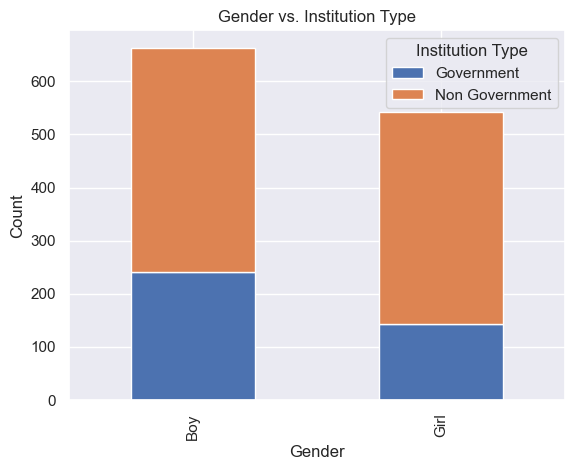

In [157]:
# 製作堆疊條形圖
cross_tab.plot(kind='bar', stacked=True)
plt.title('Gender vs. Institution Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Conclution

透過性別與公私立學校的交叉表分析，結合教育水平的比較，我們可以得出一些重要的結論。這些結論對於我們理解教育體系中的性別差異以及公私立學校之間的差異具有重要的啟示。  

這項研究還顯示了在公立和私立學校之間存在教育差異。通過交叉比較，我們可以看到不同學校體制對性別差異有不同的影響。這可能表明公立學校和私立學校在性別平等方面的政策和實踐存在差異，需要更深入的研究以確定其原因和後果。